# Transformer


##
## Why transformer reduce the effective resolution and how does Multi-Head Attention solve such a problem?

## Residual connections

## Additive attention and Dot-product attention
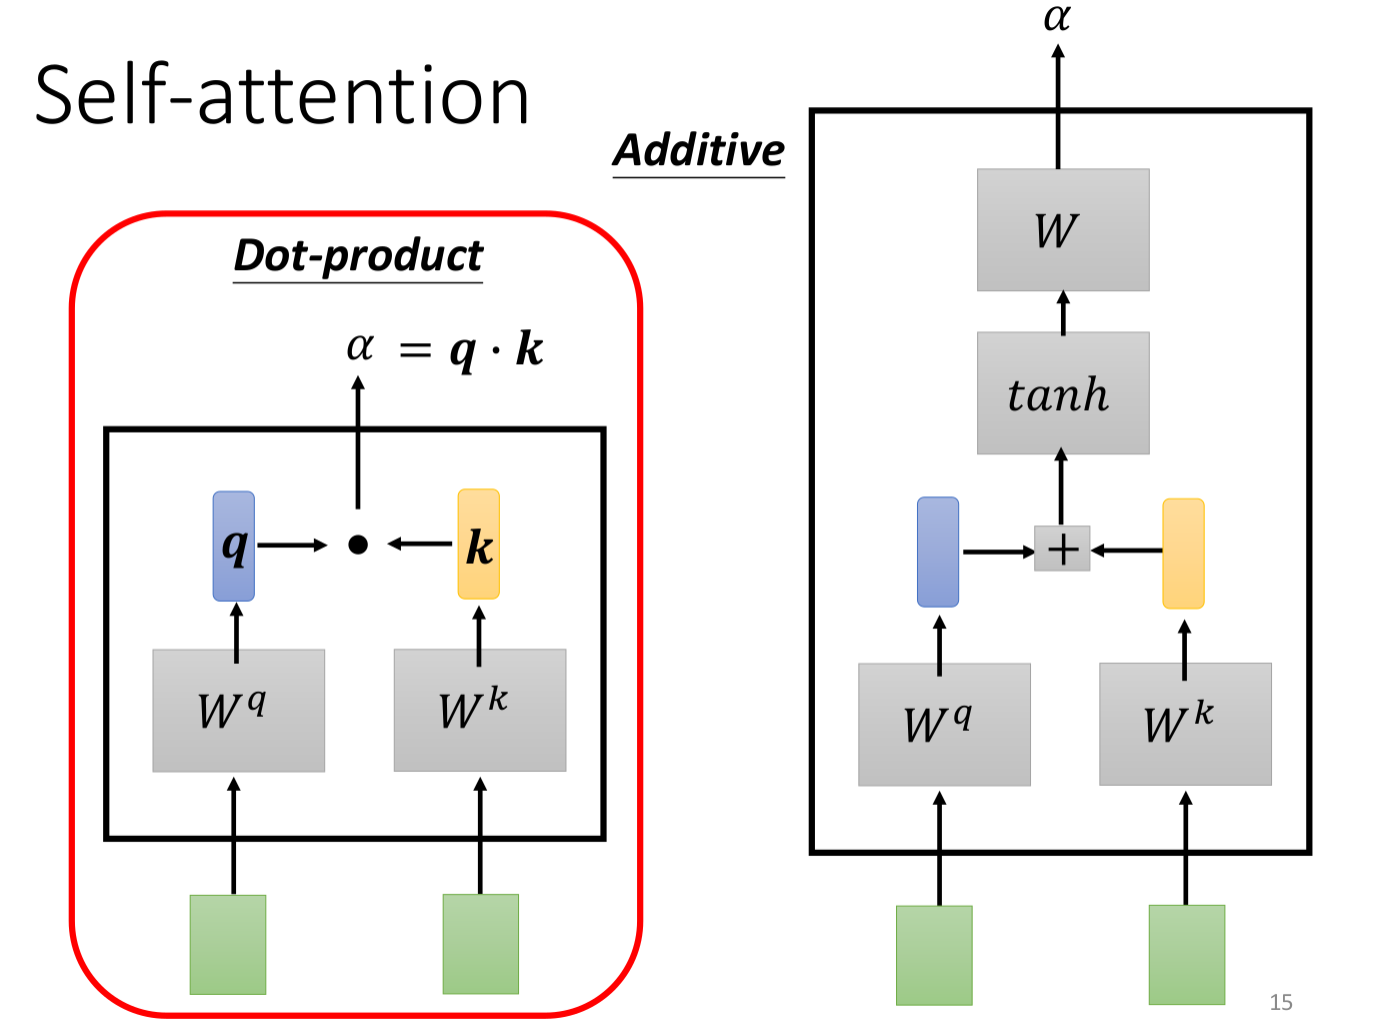
## Multi-Head Attention
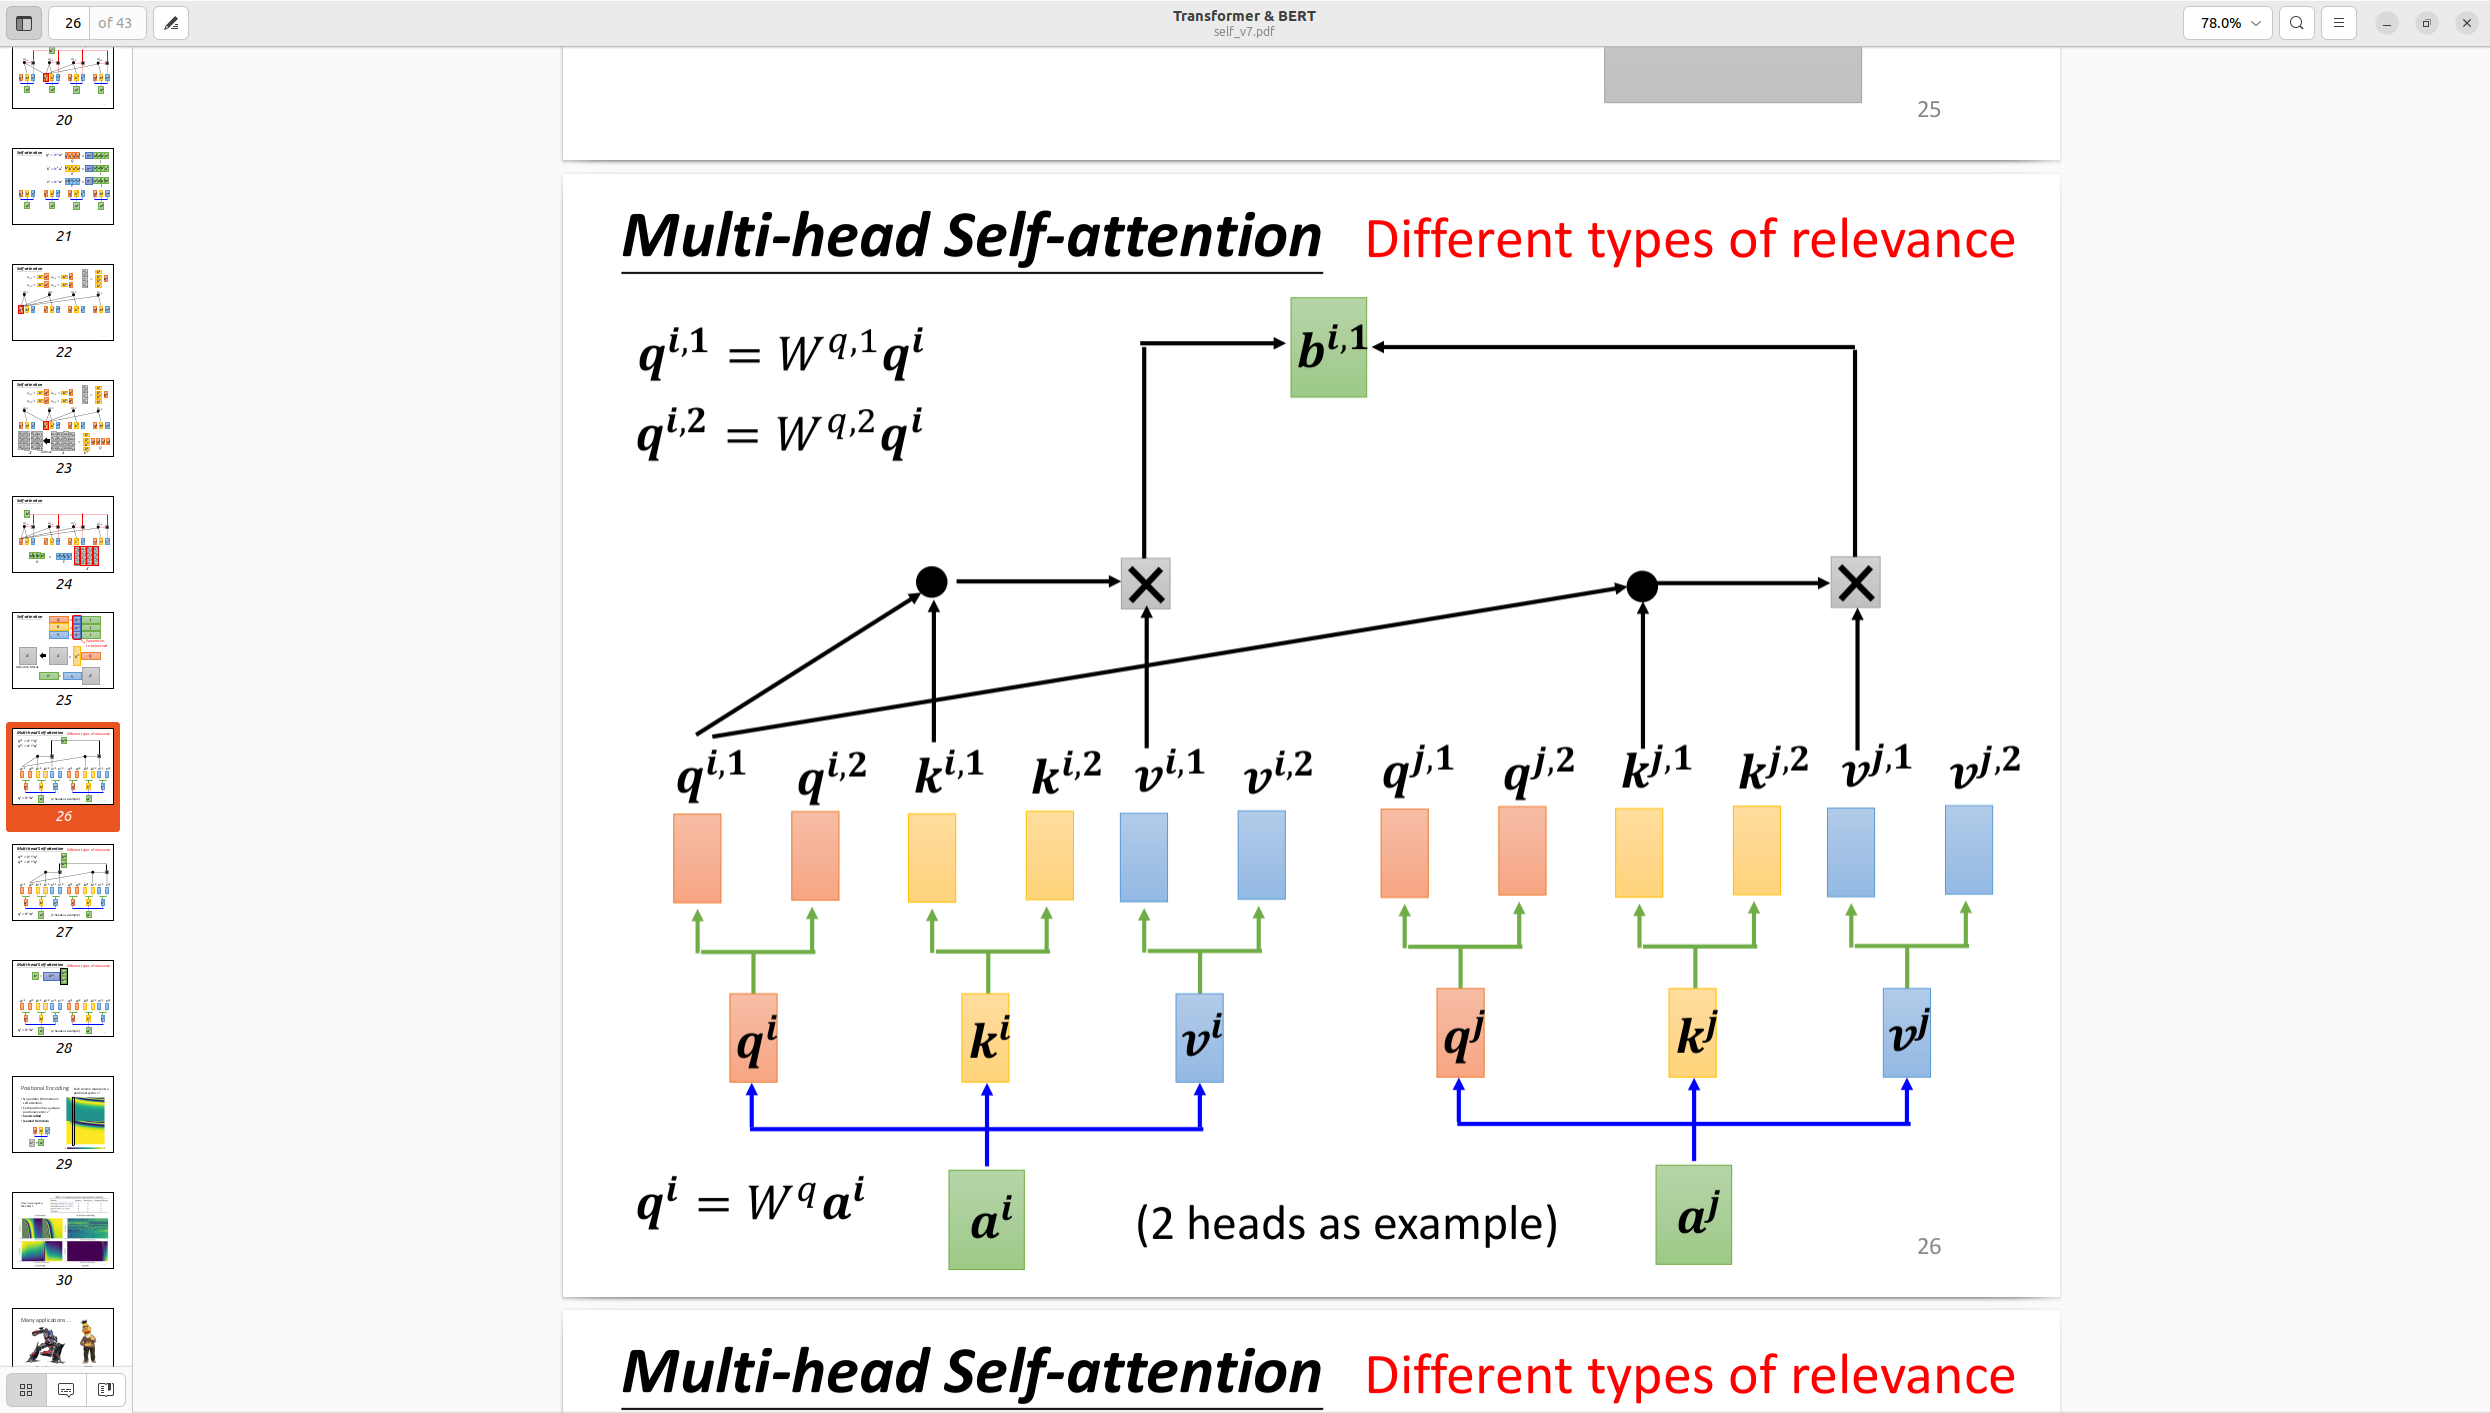

##

## Positional Encoding
Since the transformer is position-insensitive,additional position information needs to be fed into the model. The following code demonstrates the working mechanism of sinusoidal positional encoding.

PE_shape torch.Size([4, 512, 1])
PE第0个位置、前5个维度的结果：
 tensor([[ 1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [ 0.5403,  0.8415,  0.5697,  0.8219,  0.5974,  0.8020,  0.6234,  0.7819],
        [-0.4161,  0.9093, -0.3509,  0.9364, -0.2863,  0.9581, -0.2227,  0.9749],
        [-0.9900,  0.1411, -0.9695,  0.2451, -0.9394,  0.3428, -0.9011,  0.4336]])


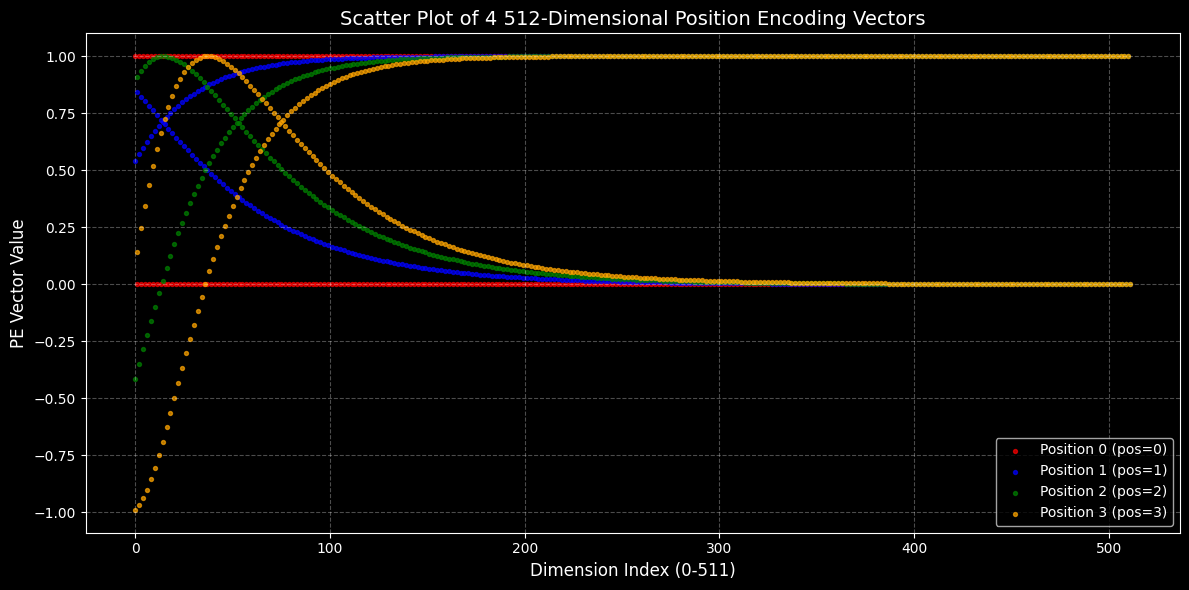

tensor(256.)
tensor(249.1021)
tensor(231.7336)
tensor(211.7495)
----------------
tensor(256.)
tensor(249.1021)
tensor(231.7336)
----------------
tensor(256.)
tensor(249.1021)
----------------
tensor(256.)
----------------


In [7]:
#Positonal encoding
import torch
from matplotlib import pyplot as plt

pos = torch.arange(0,4,1).float()
d_model = torch.arange(0,511,1).int()
PE = torch.empty((len(pos), 512, 1), dtype=torch.float32)

for pos_idx in range(len(pos)):
    current_pos = pos[pos_idx]
    for dim_j in range(512):
        if dim_j%2 == 0:
            j = dim_j/2
            pe_temp = torch.cos(current_pos/10000.0**(j/256.0))
        else:
            j = (dim_j-1)/2
            pe_temp = torch.sin(current_pos/10000.0**(j/256.0))
        PE[pos_idx, dim_j,0] = pe_temp
print("PE_shape", PE.shape)
print("PE第0个位置、前5个维度的结果：\n", PE[:, :8, 0])
# 处理数据：去掉最后一维（1），转为(4, 512)的格式，方便绘图（matplotlib支持PyTorch张量直接绘图）
PE_data = PE.squeeze(-1)  # 挤压最后一维，形状从(4, 512, 1) → (4, 512)

# 第二步：绘制散点图（无中文，无字体错误）
fig, ax = plt.subplots(figsize=(12, 6))

# 英文标签，适配默认字体
colors = ["red", "blue", "green", "orange"]
labels = [f"Position {i} (pos={i})" for i in range(len(pos))]

# 绘制散点图
x_axis = torch.arange(512)
for idx in range(len(pos)):
    y_axis = PE_data[idx]
    ax.scatter(x_axis, y_axis, color=colors[idx], label=labels[idx], s=8, alpha=0.7)

# 英文标题和坐标轴标签
ax.set_title("Scatter Plot of 4 512-Dimensional Position Encoding Vectors", fontsize=14)
ax.set_xlabel("Dimension Index (0-511)", fontsize=12)
ax.set_ylabel("PE Vector Value", fontsize=12)
ax.legend(loc="best")
ax.grid(True, alpha=0.3, linestyle="--")

# 显示图表
plt.tight_layout()
plt.show()

#用点积衡量位置向量之间的相似性
for n in range(len(pos)):
    for m in range(n,len(pos)):
        sim = torch.dot(PE_data[n], PE_data[m])
        print(sim)
    print('----------------')

从上述计算结果可以很明显地看出，正余弦位置编码有很好优势，相同间隔的词汇之间有完全相同的内积，也就是说，保证了各个词汇绝对位置各不相同的同时，还能够体现精确的相对位置关系（相邻则向量接近，远离则向量不同，间隔越远，向量差异越大）

Word Embedding
每个词汇是一个向量

## How does softmax work?
For example,every word will get a score $x_i$,then we:
$$
m_i = \exp(x_i)
$$
now we can get the result after softmax:
$$
s_i = \frac{m_i}{\sum_{i=0}^{n}m_i}
$$
By the method, we convert scores' value to [0,1],and the sum is $\sum_{i=0}^{n} = 1$

##